In [1]:
!python -m venv newenv
!source newenv/bin/activate  # Activate the environment (Linux/macOS)


In [2]:
!pip install Flask==2.0.1 itsdangerous==2.0.1 Werkzeug==2.0.1

In [3]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output

# Load the CSV data
data = pd.read_csv('bme280_data.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout for the dashboard
app.layout = html.Div([
    html.H1("Weather Dashboard (Temperature, Humidity, Pressure)"),
    dcc.Graph(id='weather-graph'),
    dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'Temperature (C)', 'value': 'Temperature (C)'},
            {'label': 'Humidity (%)', 'value': 'Humidity (%)'},
            {'label': 'Pressure (hPa)', 'value': 'Pressure (hPa)'}
        ],
        value='Temperature (C)',
        multi=True
    ),
    dcc.RangeSlider(
        id='time-slider',
        min=0,
        max=len(data) - 1,
        value=[0, len(data) - 1],
        marks={i: str(i) for i in range(0, len(data), len(data)//10)},
        step=1
    )
])

# Callback for updating the graph based on selected variables and time frame
@app.callback(
    Output('weather-graph', 'figure'),
    [Input('variable-dropdown', 'value'),
     Input('time-slider', 'value')]
)
def update_graph(selected_vars, time_range):
    # Ensure selected_vars is not None or empty
    if not selected_vars:
        return {
            'data': [],
            'layout': go.Layout(
                title='No data selected',
                xaxis={'title': 'Time'},
                yaxis={'title': 'Values'},
                hovermode='closest'
            )
        }

    filtered_data = data.iloc[time_range[0]:time_range[1]]

    # Convert to list if a single value is selected
    if not isinstance(selected_vars, list):
        selected_vars = [selected_vars]

    traces = []
    for var in selected_vars:
        traces.append(go.Scatter(
            x=filtered_data['Timestamp'],
            y=filtered_data[var],
            mode='lines',
            name=var
        ))

    return {
        'data': traces,
        'layout': go.Layout(
            title='Weather Data Visualization',
            xaxis={'title': 'Time'},
            yaxis={'title': 'Values'},
            hovermode='closest'
        )
    }

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


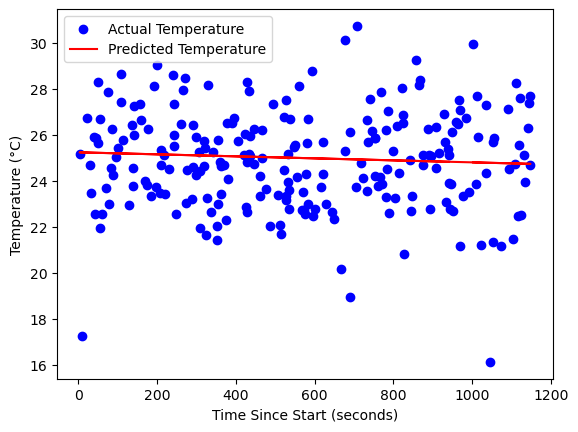

In [4]:
# Correcting the parameter names and rerunning the Linear Regression code with the correct column names

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('bme280_data.csv')

# Extract features and target (using correct column names)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['time_since_start'] = (data['Timestamp'] - data['Timestamp'][0]).dt.total_seconds()
X = data[['time_since_start']]
y = data['Temperature (C)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the predictions vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Temperature')
plt.plot(X_test, y_pred, color='red', label='Predicted Temperature')
plt.xlabel('Time Since Start (seconds)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



In [13]:
# Correcting the parameter names in the rule-based rain prediction function
def rain_prediction(Humidity, Pressure):
    if Humidity > 80 and Pressure < 1010:  # Example thresholds
        return 'Likely to rain'
    else:
        return 'Unlikely to rain'

# Apply the rule-based prediction to the data
data['rain_prediction'] = data.apply(lambda row: rain_prediction(row['Humidity (%)'], row['Pressure (hPa)']), axis=1)

# Display the data with predictions
data[['Timestamp', 'Humidity (%)', 'Pressure (hPa)', 'rain_prediction']].head()


,Timestamp,Humidity (%),Pressure (hPa),rain_prediction
0,2024-10-01 11:28:51.677797,50.446986,1011.786447,Unlikely to rain
1,2024-10-01 11:28:52.677797,45.361083,1014.141013,Unlikely to rain
2,2024-10-01 11:28:53.677797,54.679392,1014.588950,Unlikely to rain
3,2024-10-01 11:28:54.677797,50.101435,1020.761310,Unlikely to rain
4,2024-10-01 11:28:55.677797,50.306631,1001.610877,Unlikely to rain


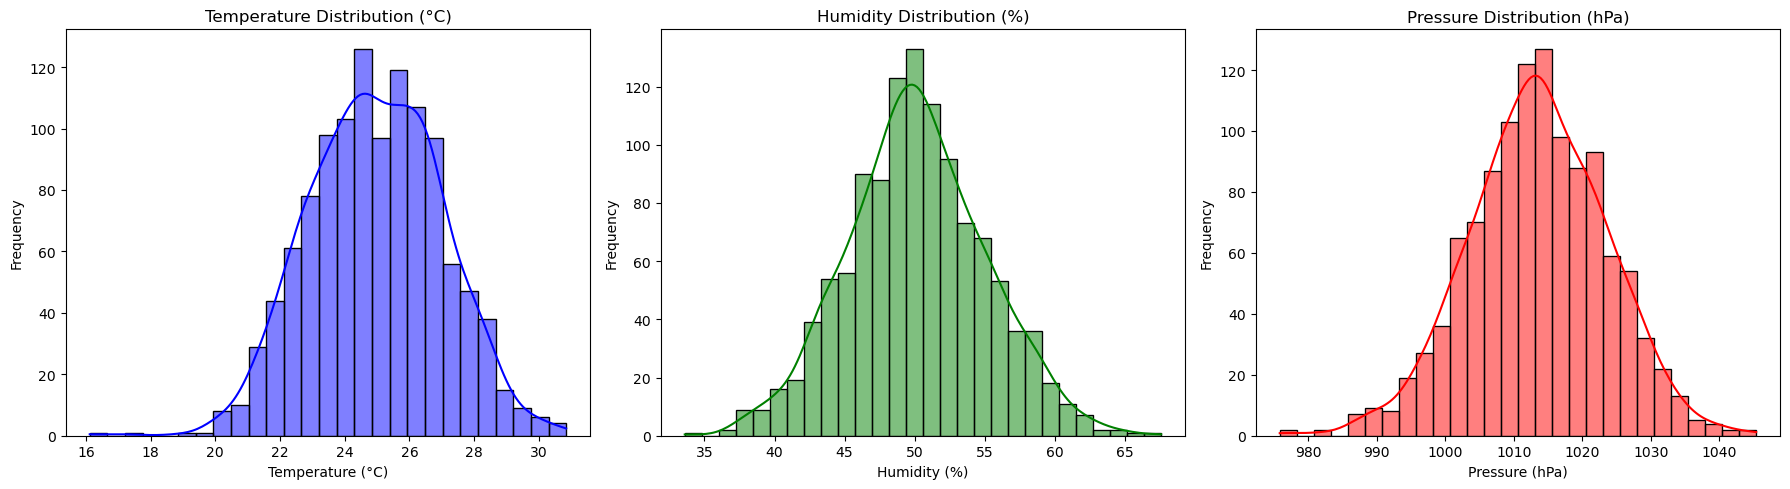

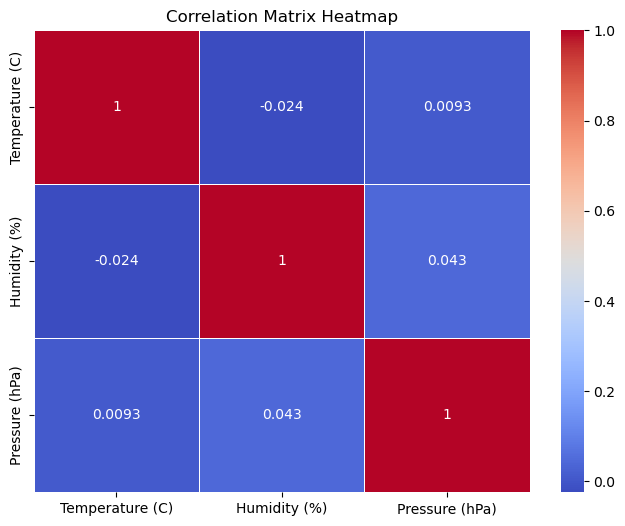

,Temperature (C),Humidity (%),Pressure (hPa),time_since_start
count,1156.000000,1156.000000,1156.000000,1156.000000
mean,24.958550,50.156627,1013.446099,577.500000
std,2.038855,4.929962,10.027165,333.852762
min,16.116500,33.596577,975.818108,0.000000
25%,23.508578,46.861938,1007.040834,288.750000
50%,24.952705,50.031700,1013.472918,577.500000
75%,26.422090,53.252728,1020.169943,866.250000
max,30.845532,67.572692,1045.359175,1155.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistical summary of the dataset
statistical_summary = data.describe()

# Plotting the data distributions for Temperature, Humidity, and Pressure
plt.figure(figsize=(18, 5))

# Temperature distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Temperature (C)'], kde=True, color='blue')
plt.title('Temperature Distribution (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Humidity distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Humidity (%)'], kde=True, color='green')
plt.title('Humidity Distribution (%)')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

# Pressure distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Pressure (hPa)'], kde=True, color='red')
plt.title('Pressure Distribution (hPa)')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = data[['Temperature (C)', 'Humidity (%)', 'Pressure (hPa)']].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Displaying the statistical summary
statistical_summary
